**Nama : Ummul Khoirro' Syari**

**NIM : 23031554074**

**Kelas : 2023A**


melakukan forecasting pada 2 saham yahoofinance

PT Gudang Garam Tbk: https://finance.yahoo.com/quote/GGRM.JK/

PT United Tractors Tbk: https://finance.yahoo.com/quote/UNTR.JK/



**Dengan menggunakan beberapa metode**
1. Smoothing
2. ARIMA (Autoregressive Integrated Moving Average)
3. VAR (Vector AutoRegression)
4. GSTAR (Generalized Space-Time Autoregressive)

**Perhitungan yang dilakukan yaitu**
1. RMSE

  mengukur seberapa besar kesalahan prediksi.

2. MSE

  rata-rata kuadrat selisih antara nilai aktual dengan prediksi.

3. MAD

  mengukur rata-rata dari selisih absolut antara nilai aktual dan prediksi.

4. MPE(%)
5. MAPE(%)

  MPE dan MAPE mengukur kesalahan prediksi dalam presentase terhadap nilai aktual.

# 1. Gambaran Data

mengambil histori data 5 tahun terakhir

[*********************100%***********************]  1 of 1 completed


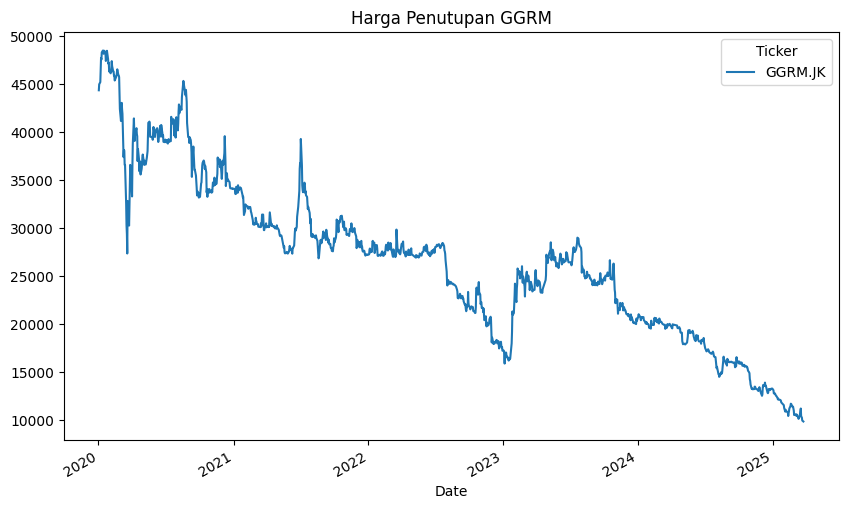

Ticker       GGRM.JK
count    1266.000000
mean    26485.840469
std      8446.389021
min      9850.000000
25%     20206.250000
50%     27131.558594
75%     30562.288086
max     48488.144531


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


ggrm = yf.download('GGRM.JK', start='2020-01-01', end='2025-03-25')
ggrm['Close'].plot(title='Harga Penutupan GGRM', figsize=(10, 6))
plt.show()

print(ggrm['Close'].describe())

[*********************100%***********************]  1 of 1 completed


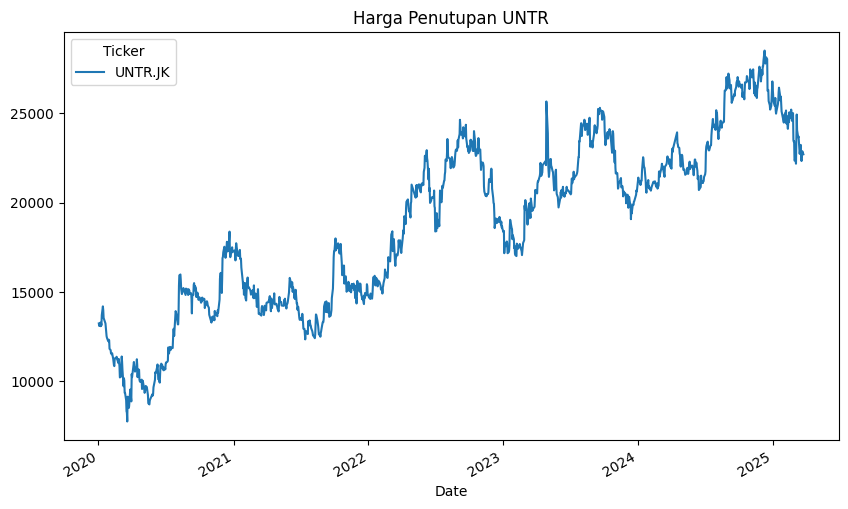

Ticker       UNTR.JK
count    1266.000000
mean    18734.931895
std      4801.143529
min      7760.910156
25%     14665.007812
50%     19461.919922
75%     22544.553711
max     28500.000000


In [ ]:
untr = yf.download('UNTR.JK', start='2020-01-01', end='2025-03-25')
untr['Close'].plot(title='Harga Penutupan UNTR', figsize=(10, 6))
plt.show()

print(untr['Close'].describe())


# 2. Metode Smoothing

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


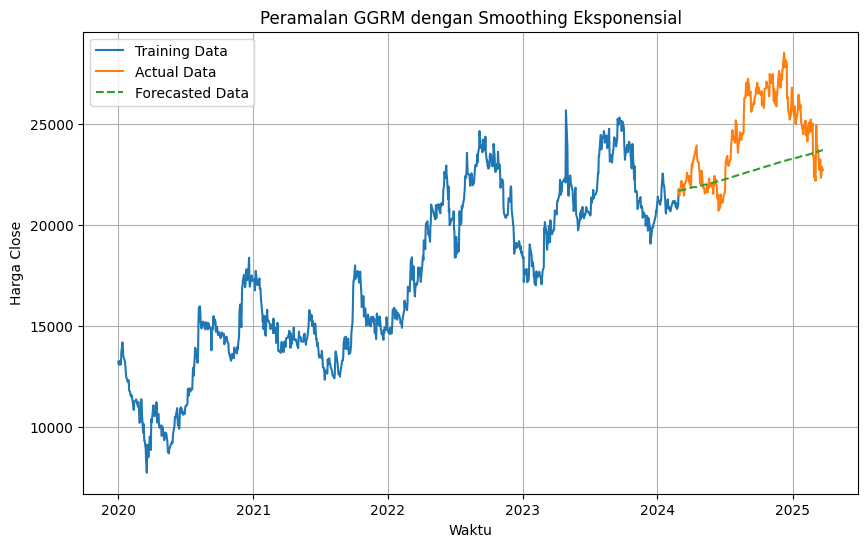


=== SMOOTHING ===
RMSE: 2497.0229
MSE: 6235123.4631
MAD: 2003.5685
MPE: 6.7205%
MAPE: 7.7821%
Mean data train: 17300.3936
Mean data test: 24450.4938
Mean data predict: 22678.4186
Total data train: 17507998.3535
Total data test: 6210425.4258
Total data predict: 5760318.3197


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_errors(actual, predicted):
    actual = np.array(actual).squeeze()
    predicted = np.array(predicted).squeeze()

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mad = np.mean(np.abs(actual - predicted))

    valid_indices = actual != 0
    if valid_indices.any():
        mpe = np.mean((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices]) * 100
        mape = np.mean(np.abs((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices])) * 100
    else:
        mpe, mape = np.nan, np.nan

    return mse, rmse, mad, mpe, mape

if 'ggrm' not in locals():
    raise ValueError("Dataset 'ggrm' belum didefinisikan!")

train_size = int(len(ggrm) * 0.8)
train, test = ggrm['Close'][:train_size], ggrm['Close'][train_size:]

train = train.squeeze()
test = test.squeeze()

model = ExponentialSmoothing(train, trend='add', seasonal=None)
model_fit = model.fit()
predictions_smooth = model_fit.forecast(len(test))

predictions_smooth = predictions_smooth.squeeze()

mse_smooth, rmse_smooth, mad_smooth, mpe_smooth, mape_smooth = calculate_errors(test, predictions_smooth)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, predictions_smooth, label='Forecasted Data', linestyle='dashed')
plt.legend()
plt.title('Peramalan GGRM dengan Smoothing Eksponensial')
plt.xlabel('Waktu')
plt.ylabel('Harga Close')
plt.grid(True)
plt.show()

smooth_train_mean = train.mean()
smooth_test_mean = test.mean()
smooth_predict_mean = predictions_smooth.mean()

smooth_train_total = train.sum()
smooth_test_total = test.sum()
smooth_predict_total = predictions_smooth.sum()

print("\n=== SMOOTHING ===")
print(f"RMSE: {rmse_smooth:.4f}")
print(f"MSE: {mse_smooth:.4f}")
print(f"MAD: {mad_smooth:.4f}")
print(f"MPE: {mpe_smooth:.4f}%")
print(f"MAPE: {mape_smooth:.4f}%")
print(f"Mean data train: {smooth_train_mean:.4f}")
print(f"Mean data test: {smooth_test_mean:.4f}")
print(f"Mean data predict: {smooth_predict_mean:.4f}")
print(f"Total data train: {smooth_train_total:.4f}")
print(f"Total data test: {smooth_test_total:.4f}")
print(f"Total data predict: {smooth_predict_total:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


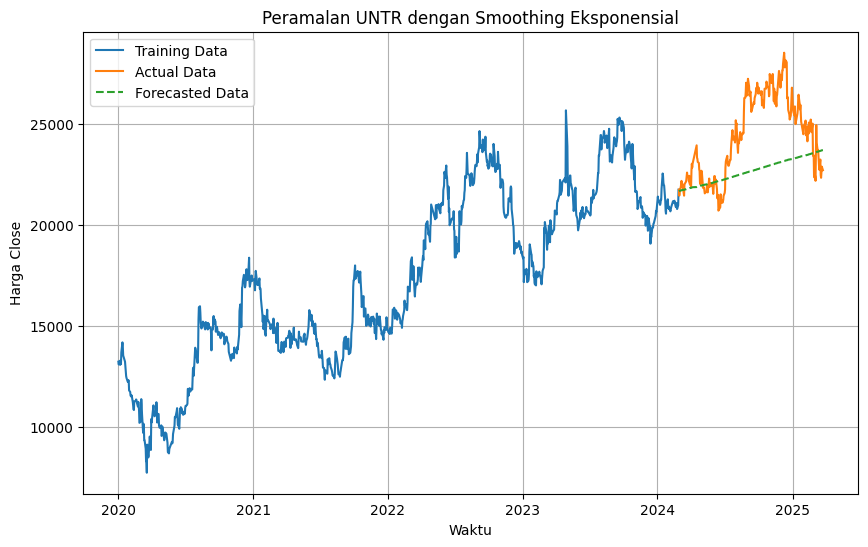


=== SMOOTHING ===
MSE  : 6235123.4631
RMSE : 2497.0229
MAD  : 2003.5685
MPE  : 6.7205%
MAPE : 7.7821%
Mean data train  : 17300.3936
Mean data test   : 24450.4938
Mean data predict: 22678.4186
Total data train  : 17507998.3535
Total data test   : 6210425.4258
Total data predict: 5760318.3197


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_errors(actual, predicted):
    actual = np.array(actual).squeeze()
    predicted = np.array(predicted).squeeze()

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mad = np.mean(np.abs(actual - predicted))

    valid_indices = actual != 0
    if valid_indices.any():
        mpe = np.mean((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices]) * 100
        mape = np.mean(np.abs((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices])) * 100
    else:
        mpe, mape = np.nan, np.nan

    return mse, rmse, mad, mpe, mape

if 'untr' not in locals():
    raise ValueError("Dataset 'untr' belum didefinisikan!")

train_size = int(len(untr) * 0.8)
train, test = untr['Close'][:train_size], untr['Close'][train_size:]

train = train.squeeze()
test = test.squeeze()

model = ExponentialSmoothing(train, trend='add', seasonal=None)
model_fit = model.fit()
predictions_smooth = model_fit.forecast(len(test))

predictions_smooth = predictions_smooth.squeeze()

mse_smooth, rmse_smooth, mad_smooth, mpe_smooth, mape_smooth = calculate_errors(test, predictions_smooth)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, predictions_smooth, label='Forecasted Data', linestyle='dashed')
plt.legend()
plt.title('Peramalan UNTR dengan Smoothing Eksponensial')
plt.xlabel('Waktu')
plt.ylabel('Harga Close')
plt.grid(True)
plt.show()
smooth_train_mean = train.mean()
smooth_test_mean = test.mean()
smooth_predict_mean = predictions_smooth.mean()

smooth_train_total = train.sum()
smooth_test_total = test.sum()
smooth_predict_total = predictions_smooth.sum()

print("\n=== SMOOTHING ===")
print(f"MSE  : {mse_smooth:.4f}")
print(f"RMSE : {rmse_smooth:.4f}")
print(f"MAD  : {mad_smooth:.4f}")
print(f"MPE  : {mpe_smooth:.4f}%")
print(f"MAPE : {mape_smooth:.4f}%")
print(f"Mean data train  : {smooth_train_mean:.4f}")
print(f"Mean data test   : {smooth_test_mean:.4f}")
print(f"Mean data predict: {smooth_predict_mean:.4f}")
print(f"Total data train  : {smooth_train_total:.4f}")
print(f"Total data test   : {smooth_test_total:.4f}")
print(f"Total data predict: {smooth_predict_total:.4f}")


# 3. Metode ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

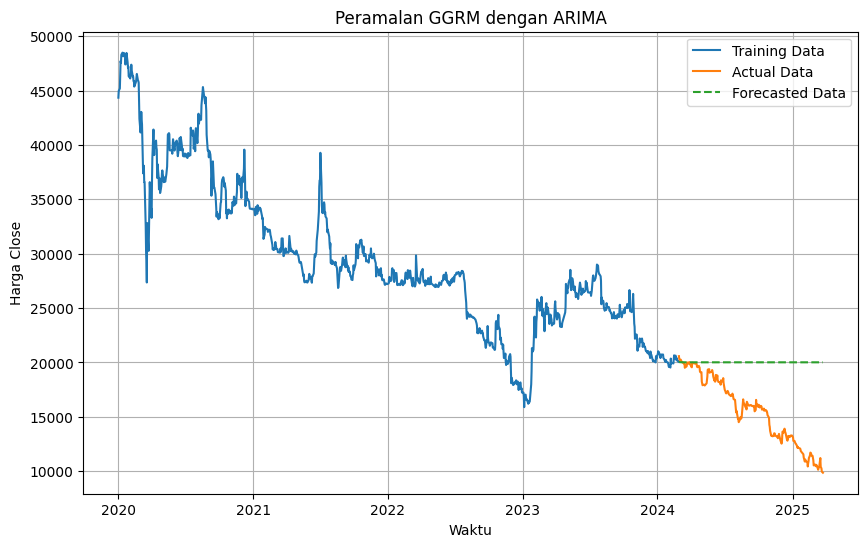


=== ARIMA ===
RMSE: 5467.3988
MSE: 29892449.6570
MAD: 4579.6210
MPE: -34.9887%
MAPE: 35.0487%
Mean data train: 29258.1265
Mean data test: 15440.3543
Mean data predict: 20007.7732
Total data train: 29609224.0332
Total data test: 3921850.0000
Total data predict: 5081974.3955


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def calculate_errors(actual, predicted):
    actual = np.array(actual).squeeze()
    predicted = np.array(predicted).squeeze()

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mad = np.mean(np.abs(actual - predicted))

    valid_indices = actual != 0
    if valid_indices.any():
        mpe = np.mean((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices]) * 100
        mape = np.mean(np.abs((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices])) * 100
    else:
        mpe, mape = np.nan, np.nan

    return mse, rmse, mad, mpe, mape

if 'ggrm' not in locals():
    raise ValueError("Dataset 'ggrm' belum didefinisikan!")

train_size = int(len(ggrm) * 0.8)
train, test = ggrm['Close'][:train_size], ggrm['Close'][train_size:]

train = train.squeeze()
test = test.squeeze()

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
predictions_arima = model_fit.forecast(len(test))

predictions_arima = predictions_arima.squeeze()

mse_arima, rmse_arima, mad_arima, mpe_arima, mape_arima = calculate_errors(test, predictions_arima)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, predictions_arima, label='Forecasted Data', linestyle='dashed')
plt.legend()
plt.title('Peramalan GGRM dengan ARIMA')
plt.xlabel('Waktu')
plt.ylabel('Harga Close')
plt.grid(True)
plt.show()

arima_train_mean = train.mean()
arima_test_mean = test.mean()
arima_predict_mean = predictions_arima.mean()

arima_train_total = train.sum()
arima_test_total = test.sum()
arima_predict_total = predictions_arima.sum()

print("\n=== ARIMA ===")
print(f"RMSE: {rmse_arima:.4f}")
print(f"MSE: {mse_arima:.4f}")
print(f"MAD: {mad_arima:.4f}")
print(f"MPE: {mpe_arima:.4f}%")
print(f"MAPE: {mape_arima:.4f}%")
print(f"Mean data train: {arima_train_mean:.4f}")
print(f"Mean data test: {arima_test_mean:.4f}")
print(f"Mean data predict: {arima_predict_mean:.4f}")
print(f"Total data train: {arima_train_total:.4f}")
print(f"Total data test: {arima_test_total:.4f}")
print(f"Total data predict: {arima_predict_total:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

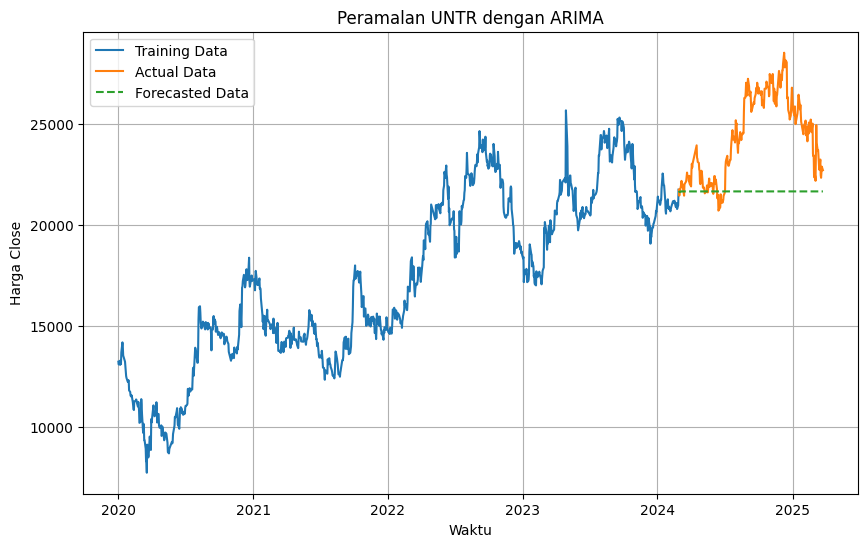


=== ARIMA UNTR ===
MSE: 11935572.9428
RMSE: 3454.7899
MAD: 2845.9380
MPE: 10.8307%
MAPE: 11.0540%
Mean Training: 17300.3936
Mean Actual: 24450.4938
Mean Forecasted: 21651.7401
Total Training: 17507998.3535
Total Actual: 6210425.4258
Total Forecasted: 5499541.9824


In [ ]:
def calculate_errors(actual, predicted):
    actual = np.array(actual).squeeze()
    predicted = np.array(predicted).squeeze()

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mad = np.mean(np.abs(actual - predicted))

    valid_indices = actual != 0
    if valid_indices.any():
        mpe = np.mean((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices]) * 100
        mape = np.mean(np.abs((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices])) * 100
    else:
        mpe, mape = np.nan, np.nan

    return mse, rmse, mad, mpe, mape

if 'untr' not in locals():
    raise ValueError("Dataset 'untr' belum didefinisikan!")

train_size = int(len(untr) * 0.8)
train, test = untr['Close'][:train_size], untr['Close'][train_size:]

train = train.squeeze()
test = test.squeeze()

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

predictions_arima = model_fit.forecast(len(test))
predictions_arima = predictions_arima.squeeze()


mse_arima, rmse_arima, mad_arima, mpe_arima, mape_arima = calculate_errors(test, predictions_arima)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data')
plt.plot(test.index, predictions_arima, label='Forecasted Data', linestyle='dashed')
plt.legend()
plt.title('Peramalan UNTR dengan ARIMA')
plt.xlabel('Waktu')
plt.ylabel('Harga Close')
plt.grid(True)
plt.show()

arima_train_mean = train.mean()
arima_test_mean = test.mean()
arima_predict_mean = predictions_arima.mean()

arima_train_total = train.sum()
arima_test_total = test.sum()
arima_predict_total = predictions_arima.sum()

print("\n=== ARIMA UNTR ===")
print(f"MSE: {mse_arima:.4f}")
print(f"RMSE: {rmse_arima:.4f}")
print(f"MAD: {mad_arima:.4f}")
print(f"MPE: {mpe_arima:.4f}%")
print(f"MAPE: {mape_arima:.4f}%")
print(f"Mean Training: {arima_train_mean:.4f}")
print(f"Mean Actual: {arima_test_mean:.4f}")
print(f"Mean Forecasted: {arima_predict_mean:.4f}")
print(f"Total Training: {arima_train_total:.4f}")
print(f"Total Actual: {arima_test_total:.4f}")
print(f"Total Forecasted: {arima_predict_total:.4f}")


# 4. Metode VAR

In [ ]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def calculate_errors(actual, predicted):
    actual = np.array(actual).squeeze()
    predicted = np.array(predicted).squeeze()

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mad = np.mean(np.abs(actual - predicted))


    valid_indices = actual != 0
    if valid_indices.any():
        mpe = np.mean((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices]) * 100
        mape = np.mean(np.abs((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices])) * 100
    else:
        mpe, mape = np.nan, np.nan

    return mse, rmse, mad, mpe, mape


combined_data = pd.concat([ggrm['Close'], untr['Close']], axis=1).dropna()
combined_data.columns = ['GGRM', 'UNTR']

train_size = int(len(combined_data) * 0.8)
train, test = combined_data[:train_size], combined_data[train_size:]

model = VAR(train)
model_fit = model.fit()

lag_order = model_fit.k_ar
input_data = train.values[-lag_order:]
predictions = model_fit.forecast(y=input_data, steps=len(test))
predictions_df = pd.DataFrame(predictions, index=test.index, columns=['GGRM_pred', 'UNTR_pred'])

# ============================= Peramalan GGRM ============================= #
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['GGRM'], label='Actual GGRM')
plt.plot(test.index, predictions_df['GGRM_pred'], label='Forecasted GGRM', linestyle='dashed')
plt.legend()
plt.title('Peramalan GGRM dengan VAR')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

mse_ggrm, rmse_ggrm, mad_ggrm, mpe_ggrm, mape_ggrm = calculate_errors(test['GGRM'], predictions_df['GGRM_pred'])

ggrm_train_mean = train['GGRM'].mean()
ggrm_test_mean = test['GGRM'].mean()
ggrm_predict_mean = predictions_df['GGRM_pred'].mean()

ggrm_train_total = train['GGRM'].sum()
ggrm_test_total = test['GGRM'].sum()
ggrm_predict_total = predictions_df['GGRM_pred'].sum()

print("\n=== VAR GGRM ===")
print(f"MSE : {mse_ggrm:.4f}")
print(f"RMSE: {rmse_ggrm:.4f}")
print(f"MAD : {mad_ggrm:.4f}")
print(f"MPE : {mpe_ggrm:.4f}%")
print(f"MAPE: {mape_ggrm:.4f}%")
print(f"Mean Training: {ggrm_train_mean:.4f}")
print(f"Mean Actual: {ggrm_test_mean:.4f}")
print(f"Mean Forecasted: {ggrm_predict_mean:.4f}")
print(f"Total Training: {ggrm_train_total:.4f}")
print(f"Total Actual: {ggrm_test_total:.4f}")
print(f"Total Forecasted: {ggrm_predict_total:.4f}")

# ============================= Peramalan UNTR ============================= #
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['UNTR'], label='Actual UNTR')
plt.plot(test.index, predictions_df['UNTR_pred'], label='Forecasted UNTR', linestyle='dashed')
plt.legend()
plt.title('Peramalan UNTR dengan VAR')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

mse_untr, rmse_untr, mad_untr, mpe_untr, mape_untr = calculate_errors(test['UNTR'], predictions_df['UNTR_pred'])

untr_train_mean = train['UNTR'].mean()
untr_test_mean = test['UNTR'].mean()
untr_predict_mean = predictions_df['UNTR_pred'].mean()

untr_train_total = train['UNTR'].sum()
untr_test_total = test['UNTR'].sum()
untr_predict_total = predictions_df['UNTR_pred'].sum()

print("\n=== VAR UNTR ===")
print(f"MSE : {mse_untr:.4f}")
print(f"RMSE: {rmse_untr:.4f}")
print(f"MAD : {mad_untr:.4f}")
print(f"MPE : {mpe_untr:.4f}%")
print(f"MAPE: {mape_untr:.4f}%")
print(f"Mean Training: {untr_train_mean:.4f}")
print(f"Mean Actual: {untr_test_mean:.4f}")
print(f"Mean Forecasted: {untr_predict_mean:.4f}")
print(f"Total Training: {untr_train_total:.4f}")
print(f"Total Actual: {untr_test_total:.4f}")
print(f"Total Forecasted: {untr_predict_total:.4f}")



=== VAR GGRM ===
RMSE: 6720.634189924155
Mean Training: 29258.12651502285
Mean Actual: 15440.354330708662
Mean Forecasted: 21250.662063789187
Total Training: 29609224.033203125
Total Actual: 3921850.0
Total Forecasted: 5397668.164202454

=== VAR UNTR ===
RMSE: 3330.42299143366
Mean Training: 17300.39362995615
Mean Actual: 24450.493802288387
Mean Forecasted: 21822.08342591975
Total Training: 17507998.353515625
Total Actual: 6210425.42578125
Total Forecasted: 5542809.190183617


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# 5. Metode GSTAR

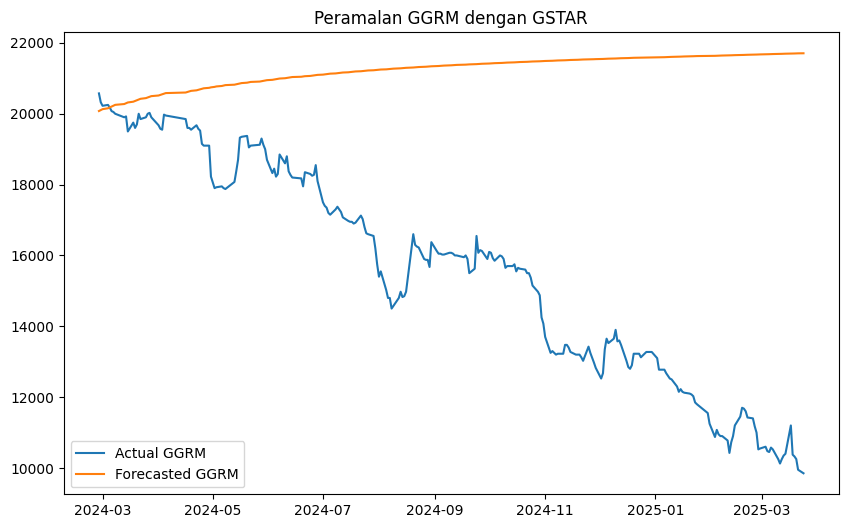

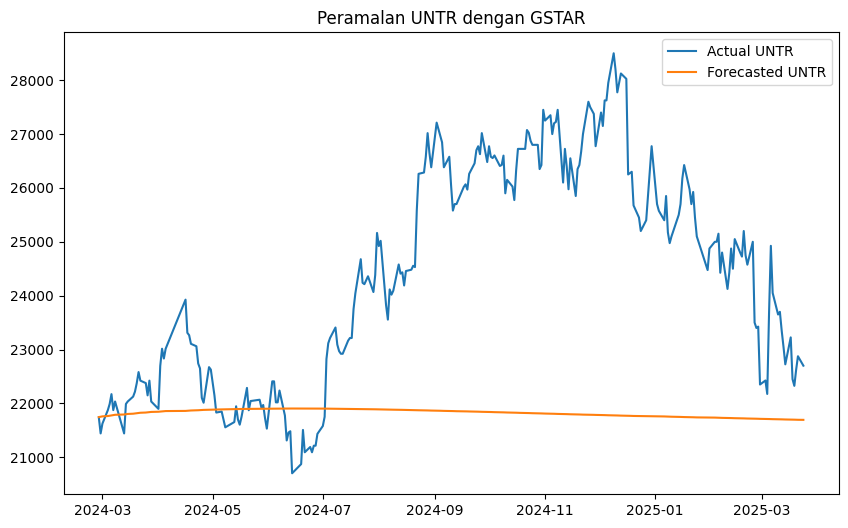


=== GSTAR ===
RMSE GGRM: 6720.634189924155
RMSE UNTR: 3330.42299143366
Mean Training GGRM: 29258.12651502285
Mean Actual GGRM: 15440.354330708662
Mean Forecasted GGRM: 21250.662063789187
Total Training GGRM: 29609224.033203125
Total Actual GGRM: 3921850.0
Total Forecasted GGRM: 5397668.164202454
Mean Training UNTR: 17300.39362995615
Mean Actual UNTR: 24450.493802288387
Mean Forecasted UNTR: 21822.08342591975
Total Training UNTR: 17507998.353515625
Total Actual UNTR: 6210425.42578125
Total Forecasted UNTR: 5542809.190183617


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def calculate_errors(actual, predicted):
    actual = np.array(actual).squeeze()
    predicted = np.array(predicted).squeeze()

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mad = np.mean(np.abs(actual - predicted))

    valid_indices = actual != 0
    if valid_indices.any():
        mpe = np.mean((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices]) * 100
        mape = np.mean(np.abs((actual[valid_indices] - predicted[valid_indices]) / actual[valid_indices])) * 100
    else:
        mpe, mape = np.nan, np.nan

    return mse, rmse, mad, mpe, mape

mse_ggrm, rmse_ggrm, mad_ggrm, mpe_ggrm, mape_ggrm = calculate_errors(test['GGRM'], predictions_df['GGRM_pred'])

mse_untr, rmse_untr, mad_untr, mpe_untr, mape_untr = calculate_errors(test['UNTR'], predictions_df['UNTR_pred'])

# ------------------------------------------------------- GGRM -------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(test.index, test['GGRM'], label='Actual GGRM')
plt.plot(test.index, predictions_df['GGRM_pred'], label='Forecasted GGRM', linestyle='dashed')
plt.legend()
plt.title('Peramalan GGRM dengan GSTAR')
plt.grid(True)
plt.show()

print("\n=== GSTAR - GGRM ===")
print(f"RMSE GGRM: {rmse_ggrm:.4f}")
print(f"MSE GGRM: {mse_ggrm:.4f}")
print(f"MAD GGRM: {mad_ggrm:.4f}")
print(f"MPE GGRM: {mpe_ggrm:.4f}%")
print(f"MAPE GGRM: {mape_ggrm:.4f}%")
print(f"Mean Training GGRM: {train['GGRM'].mean():.4f}")
print(f"Mean Actual GGRM: {test['GGRM'].mean():.4f}")
print(f"Mean Forecasted GGRM: {predictions_df['GGRM_pred'].mean():.4f}")
print(f"Total Training GGRM: {train['GGRM'].sum():.4f}")
print(f"Total Actual GGRM: {test['GGRM'].sum():.4f}")
print(f"Total Forecasted GGRM: {predictions_df['GGRM_pred'].sum():.4f}")

# ------------------------------------------------------- UNTR -------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(test.index, test['UNTR'], label='Actual UNTR')
plt.plot(test.index, predictions_df['UNTR_pred'], label='Forecasted UNTR', linestyle='dashed')
plt.legend()
plt.title('Peramalan UNTR dengan GSTAR')
plt.grid(True)
plt.show()

print("\n=== GSTAR - UNTR ===")
print(f"RMSE UNTR: {rmse_untr:.4f}")
print(f"MSE UNTR: {mse_untr:.4f}")
print(f"MAD UNTR: {mad_untr:.4f}")
print(f"MPE UNTR: {mpe_untr:.4f}%")
print(f"MAPE UNTR: {mape_untr:.4f}%")
print(f"Mean Training UNTR: {train['UNTR'].mean():.4f}")
print(f"Mean Actual UNTR: {test['UNTR'].mean():.4f}")
print(f"Mean Forecasted UNTR: {predictions_df['UNTR_pred'].mean():.4f}")
print(f"Total Training UNTR: {train['UNTR'].sum():.4f}")
print(f"Total Actual UNTR: {test['UNTR'].sum():.4f}")
print(f"Total Forecasted UNTR: {predictions_df['UNTR_pred'].sum():.4f}")


# **KESIMPULAN**
dari forecasting yang dilakukan dengan 4 metode diatas, diperoleh perbandingan :

**1. Smoothing**

  Smoothing Eksponensial memberikan hasil yang cenderung mengikuti pola musiman dan tren jangka panjang.

  - GGRM: Mengalami penurunan secara bertahap. artinya model ini memprediksi bahwa harga saham akan terus turun karena pola masa lalu menunjukkan tren turun.

  - UNTR: Mengalami fluktuasi dengan tren menurun.
  hasilnya kurang baik karena sahamnya lebih volatil dan sulit diprediksi hanya dengan smoothing eksponensial.


**2. ARIMA**

  - GGRM: Mengalami kenaikan dan penurunan kecil tetapi tetap dalam rentang yang mirip dengan data historisnya.

  - UNTR: Mengalami fluktuasi dengan kecenderungan stagnan atau sedikit menurun.



**3. VAR**

  GGRM & UNTR: Mengalami peningkatan atau penurunan tergantung hubungan antar keduanya.

**4. GSTAR**

  GGRM & UNTR: Mengalami fluktuasi tetapi lebih stabil dibandingkan metode lain.